In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.integrate import odeint,quad
from scipy.stats import kde,beta
import seaborn as sns
from importlib import reload
pi=np.pi
from scipy.optimize import brentq

#from numpy import linalg as LA
from scipy.linalg import expm # calculate the exponential matrix.
from scipy.linalg import eig

import seaborn as sns
from importlib import reload
pi=np.pi
from scipy.optimize import brentq
from numpy import linalg as LA
from scipy.linalg import expm
from scipy import interpolate
from scipy.integrate import quad, dblquad
from scipy import integrate
import string 

In [4]:
#05/05/2022
def spectralabc(m):
    l,w=eig(m) # l: the eigenvalue matrix(1 x len(m)) w the eigenvalue correspond to l, and each eigenvector is a column in w.
    return np.max(np.real(l))

def spectralrad(M):
    l,w=eig(M)
    return np.max(np.absolute(l))

#Find the vector coressponding to the spectral radius
def vecetspectralrad(M):
#    l,w,r=eig(M,left=True)
    l,w,r=eig(M,left=True)
    lmax=np.max(np.absolute(l))
    idmax=np.where(lmax==np.absolute(l))[0]
    vrmax=r[:,idmax] # right eigenvector
    vrmax=vrmax/sum(vrmax) # left eigenvector
    return(l[idmax],vrmax)

def vecetspectralabc(M):
    l,w,r=eig(M,left=True)
    lmax=np.max(np.real(l))
    idmax=np.where(lmax==np.real(l))[0]
    vrmax=r[:,idmax] # right eigenvector
    vlmax=w[:,idmax] # left eigenvector
    factor=np.dot(vlmax.transpose(),vrmax)
    vlmax=vlmax/factor
    
    return(l[idmax],vlmax,vrmax)
    

\begin{aligned}
    \frac{\text{d}S_H}{\text{d}t} &= \theta- a\beta_{VH} \frac{I_V S_H}{N_H} -\mu_{H}S_{H},\ \\
    \frac{\text{d}I_H}{\text{d}t} &= a \beta_{VH} \frac{I_V S_H}{N_H}- (\mu_H + r_H)
I_H ,\ \\
    \frac{\text{d}R_H}{\text{d}t} &= r_H I_H -\mu_H R_H,\  \\
    \frac{\text{d}S_V}{\text{d}t} &= \rho_V N_V - a \beta_{HV} I_H S_V - \mu_V S_V,\ \\
    \frac{\text{d}I_V}{\text{d}t} &= a \beta_{HV} I_H S_V -\mu_V I_V ,\
\end{aligned}
$\theta=\mu_{H}\left(S_{H}+I_{H}+R_{H}\right)$.

In [5]:
T=1
def f(t):
    return(np.sin(2*pi*t/T))  

The linearization system $X(t)=\left( I_{H},I_{V}\right)$
\begin{equation}
\dot{X}=\left(
\begin{array}{rl}
-(\mu_{H}+\gamma_{H} )& a(t)\beta_{VH}\\
a(t)\beta_{HV}N_{V} & -\mu_{V}
\end{array} \right) X(t)
\end{equation}

In [6]:
def Findlambdad(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2,ty=0):
    def f(t):
        if ty==0:
            if (t%T)/T<0.4:
                return 1
            else:
                return -1
        else:
            if (t%T)/T<0.6:
                return 1
            else:
                return -1
    def NV(t):
        return(1+epsilon*f(t)*delta)
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        
    def msisi(x,t):   # The original system 
        return(-(muh+rh)*x[0]+ra*a(t)*x[1],
               a(t)*NV(t)*x[0]-muv*x[1])
    timerad=np.linspace(0,T,T*100)
    
    
# Compute the  the spectral radius of monodromy matrix
    in0=[1,0]
    sol0=np.array(odeint(msisi,in0,timerad))
    in1=[0,1]
    sol1=np.array(odeint(msisi,in1,timerad))
    E=np.array([sol0[-1],sol1[-1]])
    E=E.transpose()
    #print("R0",E)
    R0=spectralrad(E)
    return(R0)

In [7]:
# find \lambda_{d} of model I'  ty =0: type 0: f(x)=1 for 0<x<0.4T, and ty=1: type 1: f(x)=1 for 0<x<0.6T
def FindlambdadModelIpr(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2,ty=0): 
    def f(t):
        if ty==0:
            if (t%T)/T<0.4:
                return 1
            else:
                return -1
        else:
            if (t%T)/T<0.6:
                return 1
            else:
                return -1
    def NV(t):
#        return(1+epsilon*f(t)*delta)
        return(np.e**(epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-(muh+rh)*x[0]+ra*a(t)*x[1],
               a(t)*x[0]*NV(t)-muv*x[1])
    timerad=np.linspace(0,T,T*100)
    
    
# Compute the  the spectral radius of monodromy matrix
    in0=[1,0]
    sol0=np.array(odeint(msisi,in0,timerad))
    in1=[0,1]
    sol1=np.array(odeint(msisi,in1,timerad))
    E=np.array([sol0[-1],sol1[-1]])
    E=E.transpose()
    #print("R0",E)
    R0=spectralrad(E)
    return(R0)

## Draw the first order slop

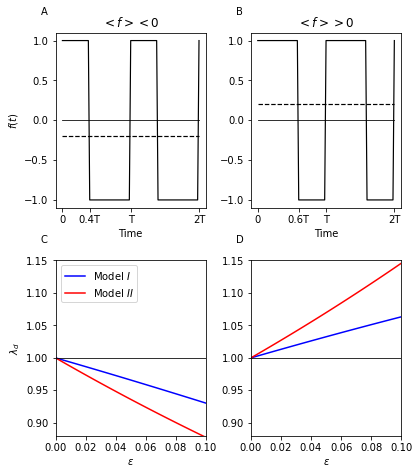

In [8]:
# 24/06/2022

w=2*np.pi
l=1
k=l+2

epsilon=0.1
muv=1
muh=0.5

rh=1.5
T=5
a0=1
ra=2

value=1
pivot=0.4 
nb=100

delta=1

def f(t):
    if (t%T)/T<pivot:
        return value
    else:
        return -value
def NV(t):
    return(1+epsilon*f(t)*delta)

timeee=np.linspace(0,2*T,101)  
val=np.zeros(len(timeee))
NVval=np.zeros(len(timeee))
ept=np.linspace(0,epsilon, nb)
#    fig,lax=plt.subplots(nrows=3,ncols=2)
fig,lax=plt.subplots(nrows=2,ncols=2)

pivot=0.4 
val=np.zeros(len(timeee))
NVval=np.zeros(len(timeee))
NV3val=np.zeros(len(timeee))
point=10
ZZ=np.zeros((point,4))
value=1
pivot=0.4   # We define new function with parameter pivot. This means if t< pivot then the value of f(t) 
            # is negative, otherwise positve with the same absolute value. 
    
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.5,wspace=0.3,hspace=0.3)
#------------------------------------------------------------------
yzero=np.zeros(len(timeee))
yone =1+np.zeros(len(ept))
#-----------------------------------------------------------------
ax=lax[0,0]
for i in range(len(val)):
    val[i]=f(timeee[i])
    NVval[i]=NV(timeee[i])
ax.plot(timeee,val,'k',linewidth=1.2,label=("$f(t)$"))
ax.plot(timeee,np.zeros(len(timeee))+value*(2*pivot-1),'k--',linewidth=1.2,label="$<f>$")
#ax.plot(timeee,val)
#ax.plot(timeee,np.zeros(len(timeee))+value*(2*pivot-1)  )
ax.plot(timeee,yzero,'k', linewidth=0.8)
sticklabel = ['0', '0.4T', 'T','2T']
stick = [0, 0.4*T, T,2*T]    
ax.set_xticks(stick)
ax.set_xticklabels(sticklabel)
ax.set_title("$<f> <0$")
ax.set_xlabel("Time")
ax.set_ylabel("$f(t)$")
ax.text(-0.1, 1.1, string.ascii_uppercase[0]+"",
transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
#ax.legend(loc=2)



#-------------------------------------------------------------------

ax=lax[1,0]


xval=np.array([np.real( Findlambdad(epsilon=e,muv=muv,muh=muh,delta=1,bprime=0,rh=rh, T=T,a0=a0,ra=ra,ty=0)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
ax.plot(ept,xval,'b',label=r"Model $I$")    

yval=np.array([np.real(Findlambdad(epsilon=e,muv=muv,muh=muh,delta=0,bprime=1,rh=rh, T=T,a0=a0,ra=ra,ty=0)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
ax.plot(ept,yval,'r',label=r"Model $II$") 

ax.plot(ept,yone,'k', linewidth=0.8)

#zval=np.array([np.real(FindlambdadModelIprp(epsilon=e,muv=muv,muh=muh,delta=1,bprime=0,rh=rh, T=T,a0=a0,ra=ra,ty=0)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
#ax.plot(ept,zval,'y',label=r"Model I'") 

ax.set_xlabel("$\epsilon $")
ax.set_ylabel("$\lambda_{d}$")
ax.set_ylim([0.88, 1.15])
ax.set_xlim([0,0.1])
ax.text(-0.1, 1.1, string.ascii_uppercase[2]+"",
transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
ax.legend(loc=2)


pivot=0.6
def f(t):
    if (t%T)/T<pivot:
        return value
    else:
        return -value
#-----------------------------------------------------------------
ax  =  lax[0,1]
for i in range(len(val)):
    val[i]=f(timeee[i])
    NVval[i]=NV(timeee[i])
ax.plot(timeee,val,'k',linewidth=1.2,label=("$f(t)$"))
ax.plot(timeee,np.zeros(len(timeee))+value*(2*pivot-1),'k--',linewidth=1.2,label="$<f>$" )
ax.plot(timeee,yzero,'k', linewidth=0.8)
ax.set_title("$<f> >0$")
ax.set_xlabel("Time")
ax.set
sticklabel = ['0', '0.6T', 'T','2T']
stick = [0, 0.6*T, T,2*T]    
ax.set_xticks(stick)
ax.set_xticklabels(sticklabel)
#ax.legend(loc=1)
ax.text(-0.1, 1.1, string.ascii_uppercase[1]+"",
transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase , ascii_lowercase

#---------------------------------------------------------------
ax=lax[1,1]
xval=np.array([np.real( Findlambdad(epsilon=e,muv=muv,muh=muh,delta=1,bprime=0,rh=rh, T=T,a0=a0,ra=ra,ty=1)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
ax.plot(ept,xval,'b',label=r"Model $I$")    
yval=np.array([np.real(Findlambdad(epsilon=e,muv=muv,muh=muh,delta=0,bprime=1,rh=rh, T=T,a0=a0,ra=ra,ty=1)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
ax.plot(ept,yval,'r',label=r"Model $II$") 

ax.plot(ept,yone,'k', linewidth=0.8)
#zval=np.array([np.real(FindlambdadModelIpr(epsilon=e,muv=muv,muh=muh,delta=1,bprime=0,rh=rh, T=T,a0=a0,ra=ra,ty=1)) for e in ept])   #lamsaetapp : ( lambda, MSA,P)
#ax.plot(ept,zval,'y',label=r"Model I'") 
ax.set_ylim([0.88, 1.15])

ax.set_xlabel("$\epsilon $")
#ax.legend(loc=1)
ax.text(-0.1, 1.1, string.ascii_uppercase[3]+"",
transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
ax.set_xlim([0,0.1])
plt.savefig("firstorder.pdf",bbox_inches = 'tight')

## Second order